# AutoGen原理

### 这节课会带给你
一、多智能体系统概述

&emsp;&emsp;1.1 Agent与AI Agent **

&emsp;&emsp;1.2 什么是多智能体系统（MAS）？ **

&emsp;&emsp;1.3 多智能体系统的特点 *

&emsp;&emsp;1.4 多智能体系统的组织方式 *

&emsp;&emsp;1.5 多智能体系统的通信机制 *

&emsp;&emsp;1.6 应用场景：软件工程 **

二、AutoGen框架

&emsp;&emsp;2.1 autogen简介 **

&emsp;&emsp;2.2 autogen环境搭建 ***

&emsp;&emsp;2.3 autogen实例 ***

&emsp;&emsp;2.4 自定义的agent回复函数 ***

&emsp;&emsp;2.5 更经济地使用chatgpt ** 

&emsp;&emsp;2.6 AutoGen Studio:可交互的多智能体工作流 ***

&emsp;&emsp;2.7 Gallery：Autogen demos *

对于学习技术的同学来说，这堂课要特别关注的是AutoGen在实际落地过程中如何搭建智能体环境、智能体之间的通信机制以及如何实现动态、多智能体交互的技术细节。在之后的示例与实践环节中，大家尤其要关注具体代码实现、环境配置、以及如何高效调用大模型API的技巧，帮助大家更深入地掌握AutoGen的技术应用。

而对于学习AI产品经理的同学们来说，你们需要关注的不仅仅是技术实现的过程，而是从产品设计和应用场景角度去理解多智能体系统能够带来的实际业务价值。具体而言，要多思考AutoGen如何优化协作效率，如何解决真实场景中的业务问题，以及如何在现有产品体系中规划和推广多智能体解决方案。

# AutoGen版本提醒
本课程使用的AutoGen版本为pyautogen==0.6.1，请不要修改。当你需要构建agent时，可以从autogen这个库中导入需要的函数和类。具体导入方法课件内也已定义好，无需修改。
# 一、多智能体概述
本章节内容：
- Agent与AI Agent
- 什么是多智能体系统（MAS）？
- 多智能体系统的特点
- 多智能体系统的组织方式
- 多智能体系统的通信机制
- 应用场景：软件工程

在介绍autogen之前，我们先为大家介绍一下关于智能体（Agent）以及多智能体系统（MAS）的一些理论知识。

## 1.1 Agent与AI Agent
&emsp;&emsp;Agent通常可以被翻译为代理，它是一个在大模型出现以前就在人工智能（AI）和计算机科学领域中被广泛讨论的概念，代表了一种能够自主执行任务、与环境交互并根据其感知做出反应的软件实体。我们创造Agent的最终目的就是使得机器能够在没有人类直接干预的情况下自主理解、规划决策、执行复杂任务。

试着回想人类完成一项任务的过程，我们通常会经历以下几个步骤：

- 感知：我们通过感官获取外部环境的信息，比如看到、听到、触摸等。

- 理解与规划：我们对感知到的信息进行处理，理解环境的状态，然后根据环境的状态制定一个行动计划。

- 执行：我们根据行动计划执行相应的动作。

同样，一个Agent的核心就是感知、理解、规划和执行。

&emsp;&emsp;感知是Agent获取环境信息的过程，对于机器来说一种可能的方式是各式各样的传感器；理解是Agent对环境信息进行处理，通常是通过各种算法和模型；规划是Agent为了某一目标根据感知到的信息而作出的决策过程，通常也依赖各种决策算法；执行是Agent根据规划执行相应的动作，通常是通过各种执行器。

&emsp;&emsp;我们所期望的Agent一定是能实现感知、理解、规划、执行、再感知、再理解、再规划、再执行的这样一个闭环过程。就像马克思所说的，人类的实践活动是实践到认识，再实践的不断循环的过程，Agent也应是如此。

&emsp;&emsp;简单地说，**Agent就是能够行动的某种东西**（英语的agent源于拉丁语的agere，意为“去做”）。从数学角度看，我们可以说Agent是一个函数，它将任意给定感知序列映射为行动。

&emsp;&emsp;如图所示的一个吸尘器世界，这个特殊的世界只有两个地点：方格A和B。吸尘器Agent可以感知它处于哪个方格中，该方格是否有灰尘，它可以选择向左移动，向右移动，吸尘，或者什么也不做。由此可以写出非常简单的Agent函数：如果当前方格有灰尘，那么吸尘；否则移动到另一方格。
<div align="center">
 <img src="images/吸尘器世界.png"/>
</div>

**大模型Agent**

&emsp;&emsp;在过去一年里，通用大语言模型（LLM）的飞速发展引起了全球的关注。百度等科技巨头推出了各自的高级大模型，不断推动语言模型性能的极限。然而，业界的目标已经超越了基本的问答功能，转而寻求利用大模型来执行更复杂、多样的任务。大模型的出现彻底改变了人工智能领域，大模型Agent也成为了人工智能领域的热门话题。

&emsp;&emsp;利用大语言模型(LLM)作为核心控制器来构建Agent，可以使得Agent具有更强的感知、理解、规划和执行能力，彻底改变了传统Agent的设计方式。

&emsp;&emsp;同时，使用大模型作为Agent的核心来创建Agent也可以缓解大模型本身的一些问题，比如大模型可能出现幻觉问题、对于实时信息了解不足、难以处理数学问题。

&emsp;&emsp;通过将大模型作为Agent的核心，为其加上外部工具加以辅助，我们便可以将整个系统看作一个Agent，从而能够更加高效、准确地完成以前大模型本身难以完成的某些任务。  

&emsp;&emsp;目前，基于 LLM 的Agent应用实例正在蓬勃发展。例如AutoGPT，一个流行的开源项目，旨在实现完全自主的系统。除了大型语言模型（如 GPT-4）的基本功能外，AutoGPT 框架还集成了各种实用的外部工具和长短期记忆管理。用户输入自定义目标后，他们可以解放双手并等待自动 GPT 自动生成想法并执行特定任务，而无需额外的人机交互提示。


## 1.2 什么是多智能体系统（MAS）？
&emsp;&emsp;Multi-agent systems（MAS）被视为一种**将复杂问题细分为较小任务**并解决的方法。将复杂任务分解为多个较小任务，每个任务被分配给一个自主实体，称为代理。每个代理都可以自主解决分配的任务，这带来了高度的灵活性。同时，相关的开销，如处理和能耗，会分摊到多个代理身上，这通常导致了与一个单一强大实体解决整个复杂问题的方法相比，MAS是成本较低的解决方案。每个代理根据多个输入（例如行动历史、与相邻代理的互动以及其目标）决定适当的行动来解决任务。MAS已经在多个领域得到了应用，包括建模复杂系统、智能电网和计算机网络。MAS中采用的分布式问题解决方式也赋予了高可靠性。在代理失败的情况下，任务可以迅速重新分配给其他代理。我们可以看几个多智能体系统的示例：

&emsp;&emsp;**机器人群体**: 例如，一群协作的机器人可能需要在未知环境中搜索目标。在这种情况下，每个机器人是一个代理，它们通过交互和协作，共同完成搜索任务。

&emsp;&emsp;**经济市场模拟**: 在一个模拟的经济市场中，买家和卖家可以被视为不同的代理，它们通过竞价和交易来达成市场交易。

&emsp;&emsp;**交通控制系统**: 在智能交通控制系统中，每个交通信号灯和车辆可以被视为代理，通过相互交互和协调，以优化交通流并减少拥堵。

&emsp;&emsp;**在线多玩家游戏**: 在一个在线多玩家游戏中，每个玩家或游戏角色可以被视为一个代理，承担不同的职责，它们通过合作或竞争来实现游戏目标。

&emsp;&emsp;**智能电网**: 在智能电网中，不同的电力生成单位、传输线路和消费者可以被视为代理，它们通过协调来优化电力分配和消耗，以实现更高的能源效率。

&emsp;&emsp;总的来说，当一个复杂任务可以拆解成多个独立模块时，适合使用多智能体系统。

## 1.3 多智能体系统的特点

多智能体系统有几个主要特点，依据这些特点可以对不同的多智能体系统进行分类：

>**领导者**：领导者的存在与否可以用来将MAS分类为无领导或领导-跟随。在无领导的MAS中，每个代理根据自己的目标自主决定自己的行动。相反，在领导-跟随中，领导代理为其他代理定义行动。领导者可以是预先定义的，也可以由代理共同选择。

>**异质性**：MAS可以分为两种类别，即：同质和异质。同质MAS包括具有相同特征和功能的代理，而异质MAS包括具有不同特征的代理。

>**拓扑结构**：指的是代理的位置和关系。MAS的拓扑结构可以是静态的或动态的。在静态拓扑结构中，代理的位置和关系在其生命周期内保持不变。而在动态拓扑结构的MAS中，随着代理的移动、离开或加入MAS，或者与其他代理建立新的通信（即关系），代理的位置和关系会发生变化。

>**动态性**：代理可以分为静态代理或移动代理。静态代理始终位于环境中的同一位置，而移动代理可以在环境中移动。例如，入侵检测系统（IDS）代理在网络中的多个服务器之间移动，分析服务器进程和通信，从而检测攻击。

根据多智能体系统的特点，我们可以选择合适的组织方式来提高系统的效率。比如如果系统不需要领导者，我们可以选择扁平结构，如果需要一个领导者，那么选择层级结构比较合适。下面我们看一下如何根据系统的特点来选择组织方式。

## 1.4 多智能体系统的组织方式
&emsp;&emsp;组织方式指的是代理通信和连接的定义方式，对于不同的场景，合理选择系统的组织方式能大大提升效率，广泛使用的方式有如下五种：

&emsp;&emsp;**扁平结构**：这是最基本的组织结构，所有代理被视为平等的。没有指定的领导者，每个代理与其邻居进行通信。如图说明了这种组织形式。<div align="center">
 <img src="images/4b769892279fb47d84fff00e13eee641ad78546eaa7d2779ba2efece2195c151.png" alt="扁平结构"/>
</div>

&emsp;&emsp;**层级结构**：在层级组织中，代理之间存在类似树状的关系。叶子代理，例如图中的代理G和H，使用它们的父代理（代理B）与其他代理进行通信。父代理控制它们的叶子代理，即子代理，并且可能有它们自己的父代理。在最高级别，有一个称为根代理（代理A）的代理。层级结构可能导致延迟或者产生瓶颈，特别是在根代理（或父代理）处，因为它负责处理所有叶子代理的通信。根据具有控制其他代理权威代理的数量，即那些有权控制其他代理的代理，层级结构可以分为两种类型，即简单和统一。在简单方法中，根代理拥有独占权，并控制所有通信。在统一方法中，层级中不仅根代理，所有或特定的父代理也可以控制它们的子代理。<div align="center">
 <img src="images/694f50eb81397245fd58fd11536a89c69b1468577b89f94b89a4bac6ee91a0d4.png" alt="层级结构"/>
</div>

&emsp;&emsp;**单元结构**：在单元结构中，代理根据特定特征（例如代理的异质性或感知能力）被组织成多个群体，这些群体被称为“单元（holons）”。然后，在多个层次中将单元层叠，如图所示。代理可以与同一单元中的其他代理或同一层次的其他单元中的代理进行通信。因此，在全局组织中，一个代理可以是同一层次中多个单元的成员，比如layer0中的灰色圆圈（代理），既属于holon4，也属于holon5。对于上层通信，使用一个头代理，这个头代理是可用资源最丰富的代理之一。当每个上级代理（上层单元成员）需要下级代理（下层单元成员）协作解决特定任务时，这种组织结构非常适合。<div align="center">
 <img src="images/350bdb27271eec7609dec33a0c47d3e8733e097619557f3afdde23d00ddc861f.png" alt="单元结构"/>
</div>

&emsp;&emsp;**联盟组织**：在联盟组织中，代理根据它们的目标暂时地分组。因此，与没有此类分组的组织相比，代理可以以更低的（处理延迟和通信）开销达到自己的目标。如图展示了一个联盟组织。每个代理可以是多个联盟的一部分，例如代理7。在达到他们的目标后，代理就会销毁联盟。联盟的内部组织通常是扁平的，如果内部使用其他组织（例如层级组织）可以进一步减少开销或对代理施加控制。寻找和组合具有相同目标的代理会给代理带来处理和通信开销。因此，联盟组织带来的好处与寻找代理并组成联盟所产生的开销之间存在一种权衡。

&emsp;&emsp;这种组织适用于多智能体系统中存在具有相似目标的代理集合，它们的协作使它们能够达到自己的目标。例如，在地震期间，一组救护车（代理）可能聚集在一起救援受伤人员。形成联盟有助于救护车有效地达到其目标，因为它们被合理地分配以覆盖更广泛的区域，从而更多地拯救受伤者。<div align="center">
 <img src="images/e67c41c77202a58f0f017c73c35642e099a4bdaabd19b5e169ad5a909fddcbf8.png" alt="联盟组织"/>
</div>

&emsp;&emsp;**团队组织**：在团队组织中，代理创建一个团体（团队），并确定一个与其自身目标不同的团队目标，团队中的代理合作达成团队目标。如图描述了一个团队组织，一个团队可以有内部组织（例如层级结构），以提高达成团队目标的性能和效率。

&emsp;&emsp;团队中的代理数量（称为团队规模）是团队组织中的关键问题之一。一个较大的团队可以从环境中感知更多的数据，然而整合多个代理的数据和知识需要更高的处理能力。相比于大团队，小团队所能使用的数据有限，但更容易做出最终决策。在确定团队规模时，需要考虑决策开销和数据准确性之间的权衡。

&emsp;&emsp;与联盟不同，其中代理被分组以达到各自的目标，在团队中，代理试图达到团队的目标。因此，当多个代理试图达到相同的目标时，这种组织形式非常合适。<div align="center">
 <img src="images/57f1b2c2499fc234dbf8b1e23820e62e3adaecd5e236d518c1de928d34d699fd.png"  alt="名字"/>
</div>


## 1.5 多智能体系统的通信机制
除了组织形式，还要考虑到agent之间的信息交换方式，广泛使用的通信方式为：

>**消息传递**：在这种方法中，代理直接向彼此发送消息，代理使用点对点或广播通信与其他代理交流。在点对点通信中，如果代理A知道B的地址，它可以直接与代理B交流。而在广播通信模式中，代理A向其所有邻居发送消息。为了确保消息的解释性，进行通信的代理必须使用一个经过约定的结构<div align="center">
 <img src="images/3bcda4536c90b7b58b06929208e2a91d960e01450d40d02afb16728904d1dd0a.png" alt="名字"/>
</div>

>**黑板系统**：在这种通信方法中，代理可以利用一个名为黑板的中央存储库共享数据，如图所示。每个代理将自己的数据存储在黑板上，其他代理可以读取这些数据。黑板系统的模型有三个主要组成部分：
① 知识源，即Agent，是作为求解问题的独立单元，具有不同的专门知识，独立完成特定的任务。
② 黑板，即公共工作区，为知识源提供信息和数据，同时，供知识源进行修改。
③ 监控机制。根据黑板当前的问题求解状态，以及各知识源的不同求解能力，对其进行监控，使之能及时适应黑板变化。<div align="center">
 <img src="images/6afc9a09c6acefd2e65f01e2b56b1cf40591f5eb1c6bd1456ec673a701aab250.png" alt="名字"/>
</div>

&emsp;&emsp;在MAS中，代理通常只具有部分信息，因为代理主要与其直接邻居通信。一方面，这减少了通信开销，从而确保了可扩展性，因为随着代理数量的增加，开销保持相对较低。另一方面，与寻找提供特定服务的代理相关的时间和通信开销增加了。为了减少寻找代理的上述开销，特别是对于大规模MAS，引入了中间代理的概念。中间代理维护所有代理提供的服务列表。任何寻找特定服务的代理首先联系中间代理，中间代理将其引导到提供该服务的适当代理身上。

同时，消息的语义也非常重要，要确保相互通信的代理对交换的数据有相同的解释。

## 1.6 应用场景：基于ChatDev的自动化软件开发框架

<div align="center">
 <img src="images/d17e53461c7bce6664472bc90f478441538a9e51271d60505a95d9bcbf4da5e2.png" alt="名字"/>
</div>

### 引言

软件工程需要系统化的方法来开发和维护软件系统。近年来，深度学习技术的发展使得研究人员开始探索其在软件工程中的应用，旨在提高效率和降低成本。ChatDev遵循经典的瀑布模型，将设计流程分为：设计、编码、测试和文档编写，每个阶段会有多个不同角色的代理。ChatDev利用一个chat chain，将每个阶段分为原子子任务，在聊天链中，每个节点代表一个特定的子任务，两个角色参与上下文感知、多回合讨论，以提出和验证解决方案。

### 问题背景

在软件开发的每个阶段，需要多个角色之间进行有效的沟通。ChatDev通过聊天链将整个开发过程分解为顺序的原子子任务，促进角色之间的协作。

### ChatDev中软件开发的四个阶段
在介绍四个阶段前，我们先来看一下ChatDev使用的关键技术：

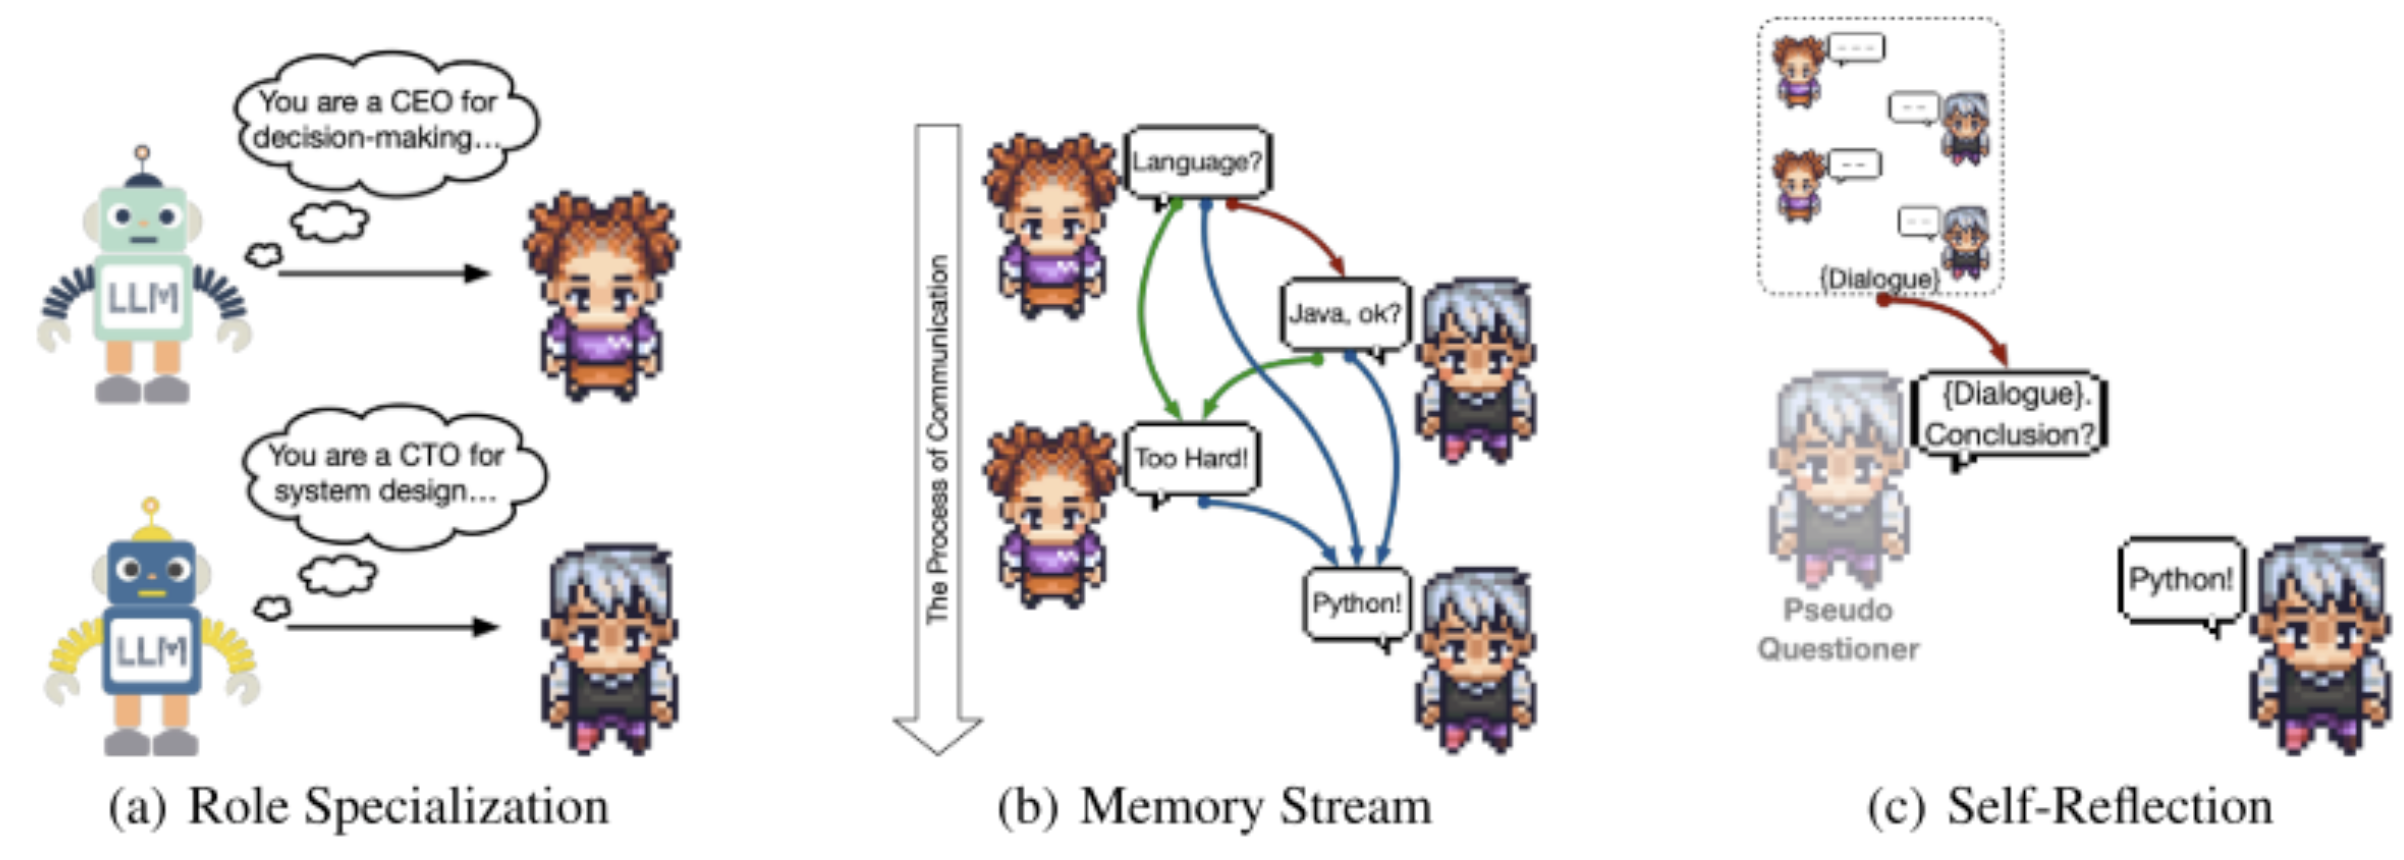

- **Role Assignment**：即角色分配，本质上是通过系统提示（System Prompts）为每个AI代理分配特定的角色和职责。
- **Memory Stream**：即记忆流，是一个用于存储和检索对话历史的机制。并通过提示来建立通信协议，如当双方达成一致时，会生成满足特定格式要求的结束信息。
- **Self Reflection**：即自我反思，当对话双方达成一致时，为了进一步确保答案的准确性，系统会引入第三方提问者，要求其从对话中提取信息摘要。这既能进一步总结对话内容，也能再次验证答案的准确性。

#### 设计阶段
- **角色分配**：通过系统提示为每个代理分配角色，如Instructor（CEO）和Assistant（CPO）。
- **协作头脑风暴**：产生创新想法并定义技术设计需求。

#### 编码阶段
- **角色**：CTO、程序员和界面设计师。
- **任务分解**：生成完整代码和设计图形用户界面。
- **思考指令**：类似于强制的思维链，CTO智能体会要求程序员智能体先给出核心类和方法，然后不断实现各个功能。

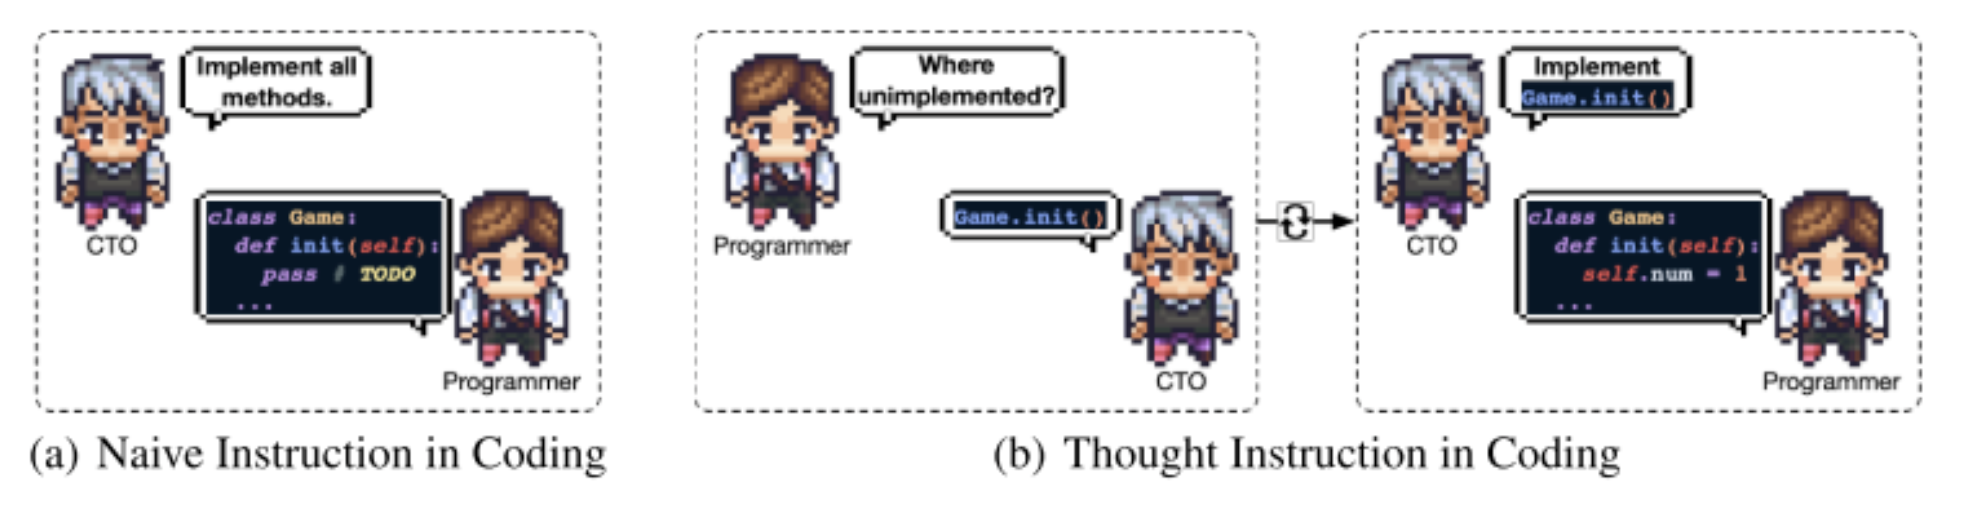


#### 测试阶段
- **角色**：程序员、评审员和测试员。
- **同行评审**：通过反馈进行系统测试，确保代码的正确性。

#### 文档编写阶段
- **角色**：CEO、CPO、CTO和程序员。
- **文档生成**：CTO指示Programmer为环境依赖项提供配置说明，从而产生一个类似requirements.txt的文档。同时，CEO向CPO传达需求和系统设计，CPO生成用户手册。

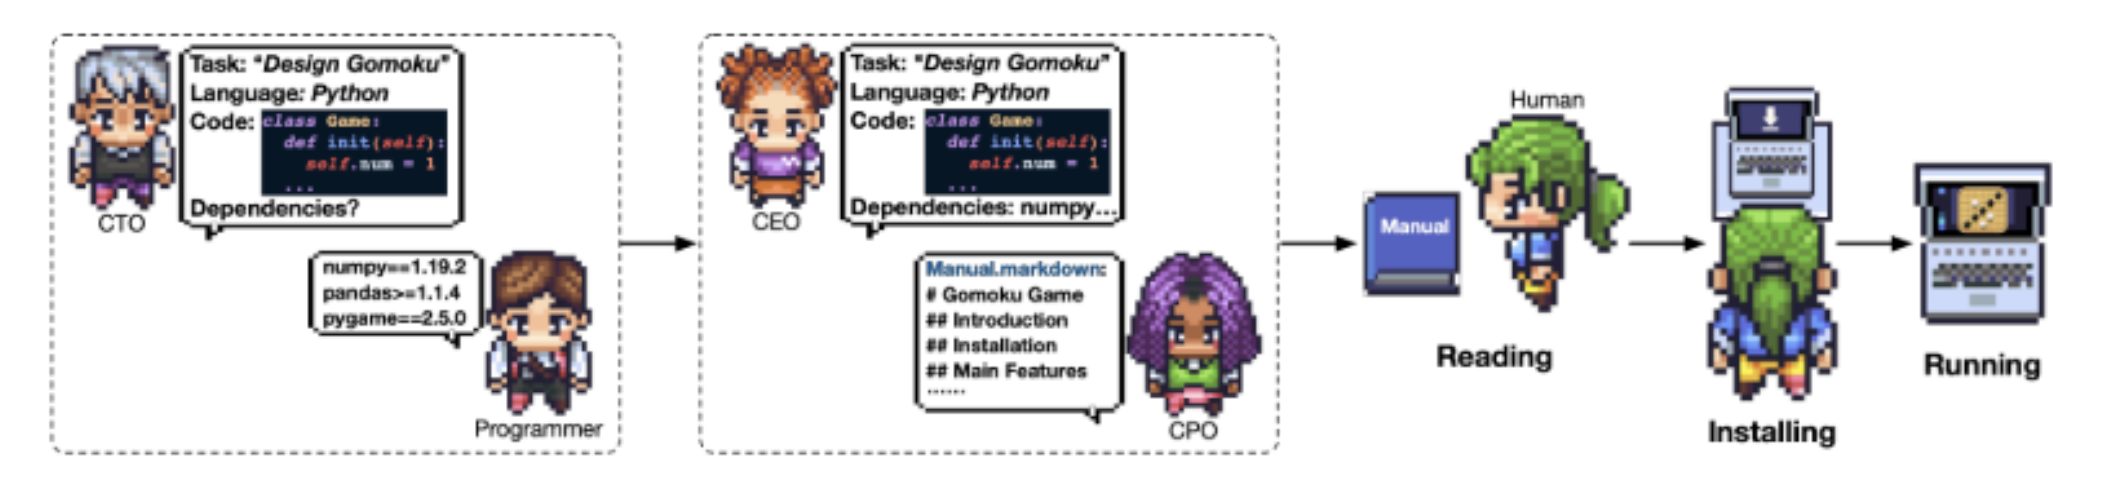

### 实验

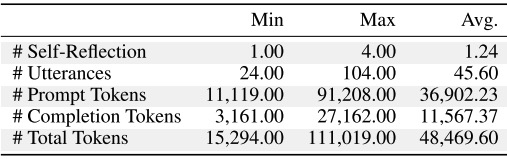

ChatDev开发一个软件平均需要36,902.23个提示token，11,567.37个完成token,总共48,469.60个token， 平均耗时409.84秒。


以下是官方的一个demo：

<video src="videos/chatdev_demo.mp4" controls="controls" width=800px style="margin-left: 0px"></video>

首先，启动chatdev后，使用chatchain visualizer进行聊天路径的定义，然后使用replay功能复现了一次智能体的聊天过程，最后，演示了一个乒乓球游戏的开发过程。智能体之间的协作以群聊的方式来进行，最后生成了一个可以直接运行的代码文件。

查看[社区贡献页](https://github.com/OpenBMB/ChatDev/blob/main/Contribution.md)，我们可以看到利用chatdev开发的各种软件，包括简单的网页、五子棋游戏、计算器、网页游戏等等：
<div align="center">
 <img src="images/chatdev_contribute.png" alt="名字" width=800px/>
</div>

### 结论
ChatDev利用LLMs来促进软件开发过程中涉及的多个角色之间的有效通信和协作。通过使用聊天链将开发过程分解为顺序的原子子任务，有效地促进了角色之间的协作。然而，我们也能够看出目前基于LLM的多智能体系统在软件开发中的应用还处于初级阶段，仍然存在一些问题，如难以处理复杂的软件开发任务、可能产生的幻觉、生产出来的软件和用户需求之间的差距等。

# 二、AutoGen框架
本章节内容：
- autogen简介
- autogen环境搭建
- autogen实例
- 自定义的agent回复函数
- 更经济地使用chatgpt
- AutoGen Studio:可交互的多智能体工作流
- Gallery：Autogen demos

## 2.1 autogen简介

&emsp;&emsp;大型语言模型（LLMs）正在成为开发强大代理的关键组成部分，在许多实际任务中发挥作用。鉴于能够受益于LLMs的任务不断增多以及任务复杂性的增加，一个直观的方法是通过使用多个合作的代理来扩大代理的能力，多个代理可以帮助鼓励不同的思考，提高事实性和推理能力，并提供验证。

利用多代理方法来实现这一目标的原因在于：
1. 针对对话优化的LLMs（例如GPT-4）展现出了吸收反馈的能力，LLM代理可以通过彼此或与人类进行对话以进行推理、观察、评论和验证。
2. 单个LLM可以展现出广泛的能力（特别是在配置了正确的提示和推理设置时），不同配置的代理之间的对话可以帮助以模块化和互补的方式结合这些广泛的LLM能力。
3. LLMs已经展示了在将任务分解为简单子任务时解决复杂任务的能力。多代理对话可以以直观的方式实现这种分割和集成。

问题是：如何借助多代理方法促进LLM应用程序的开发呢？

&emsp;&emsp;AutoGen是一个开源框架，允许开发者通过多个能够相互对话的代理构建LLM（大语言模型）应用程序来完成任务。利用AutoGen，开发者可以灵活定义代理之间的交互行为。自然语言和计算机代码都可以用来为不同的应用程序编写灵活的对话模式。AutoGen作为一个通用框架，可用于构建各种复杂度和LLM能力不同的应用。经验研究表明该框架在许多示例应用中的有效性，涵盖了数学、编码、问题解答、运筹学、在线决策、娱乐等各个领域。

&emsp;&emsp;AutoGen旨在通过代理之间的对话来解决任务。具体而言，AutoGen中的代理具有以下显著特点：

>**可对话性**：AutoGen中的代理是可对话的，这意味着任何代理都可以向其他代理发送和接收消息，以启动或继续对话。

>**可定制性**：AutoGen中的代理可以定制，以整合LLM（语言模型）、人类、工具或它们的组合。

下图展示了AutoGen中的内置代理：

<div align="center">
 <img src="images/autogen_agents-b80434bcb15d46da0c6cbeed28115f38.png" alt="名字"/>
</div>

autogen设计了一个通用的ConversableAgent类，用于通过彼此交流来共同完成任务的代理。一个代理可以与其他代理通信并执行动作。不同的代理在收到消息后执行的动作可能不同。其中两个代表性的子类是AssistantAgent和UserProxyAgent。

>**AssistantAgent**被设计成作为一个AI助手，默认使用LLM，不需要人类输入或代码执行。当接收到消息（通常是需要解决的任务描述）时，它可以为用户编写Python代码（在Python代码块中）。它还可以接收执行结果并建议修正或错误修复。其行为可以通过传递新的系统消息来改变。
>**UserProxyAgent**在概念上是人类的代理，在交互中征求人类输入作为代理的回复，并具有执行代码和调用函数的能力。

## 2.2 autogen环境搭建
<div class="alert alert-warning">
    <b>
        注意:
    </b>由于autogen涉及到自动运行llm生成的代码，为了保证平台资源的安全，鼓励本地运行代码
</div>


**python环境**： python version == 3.10.13, 使用如下命令创建一个环境
```shell
conda create -n pyautogen python=3.10.13
```

然后安装依赖：

In [12]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 3.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.7/507.7 kB 11.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling websockets-14.2:
      Successfully uninstalled websockets-14.2
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: chroma-hnswlib
    Found existing installation: chroma-hnswlib 0.7.6
    Uninstalling chroma-hnswlib-0.7.6:
     

**本教材最初是在pyautogen版本为0.2.2构建的，但较新的版本0.6.1也可以正常工作，如果你需要升级pyautogen，执行以下命令**

In [13]:
!pip install pyautogen==0.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.5/455.5 kB 9.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 kB 13.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
  Attempting uninstall: openai
    Found existing installation: openai 1.3.6
    Uninstalling openai-1.3.6:
      Successfully uninstalled openai-1.3.6
  Attempting uninstall: pyautogen
    Found existing installation: pyautogen 0.2.2
    Uninstalling pyautogen-0.2.2:
      Successfully uninstalled pyautogen-0.2.2
ERROR: pip's dependency resolver does not currently take into ac

使用**vscode**还需将以下设置勾选，否则无法完整输出代理的回复

<div align="center">
 <img src="images/bebac6d0705e77094b19a676a35a34de06ba6bd797add3f10ab02cfe5d624ca9.png"/>
</div>

**配置LLM**：将你的chatgpt key保存在一个名为 OAI_CONFIG_LIST.json 的文件中，形式如下
```python
[
    {
        'model': 'gpt-4',
        'api_key': '<your OpenAI API key here>',
    },
    {
        'model': 'gpt-4',
        'api_key': '<your Azure OpenAI API key here>',
        'base_url': '<your Azure OpenAI API base here>',
        'api_type': 'azure',
        'api_version': '2023-06-01-preview',
    },
    {
        'model': 'gpt-4-32k',
        'api_key': '<your Azure OpenAI API key here>',
        'base_url': '<your Azure OpenAI API base here>',
        'api_type': 'azure',
        'api_version': '2023-06-01-preview',
    },
]
```
**docker**(可选)：安装docker并启动docker服务，用于自动创建代码运行环境。

**魔法地址**(可选)：如果直接使用GPT，需要进行设置与魔法的端口一致，后面在代码中我们会看到如何设置。




## 2.3 autogen实例
本节以四个实例来介绍autogen的入门使用方式，学完本节，应该能够利用autogen开发具有三四个agent交互的系统。
###  例子1：一个两agent对话的示例
在下面的示例中，让我们看看如何在 AutoGen 中使用代理来编写一个 Python 脚本并执行该脚本。这个过程涉及构建一个 AssistantAgent 作为助手，并使用 UserProxyAgent 作为人类用户的代理。

In [7]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

# 配置魔法地址，能直接访问的api，比如国内大模型，则不需要这一段配置
# 访问chatgpt则需要开启vpn，并设置这段代理
# 这里的端口7890，需要与代理服务器的端口一致
# import os
# os.environ["http_proxy"]="127.0.0.1:7890"
# os.environ["https_proxy"]="127.0.0.1:7890"

# 加载LLM配置
config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST.json")
config_list = config_list_from_json(env_or_file="ds.json")

# 本地运行
use_docker = False

# 指定docker容器运行
# use_docker = "python:3"

In [10]:
# 创建了名为“user”的UserProxyAgent实例，作为人类用户的代理
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER", 
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"), # 消息以TERMINATE结尾时结束对话
    code_execution_config={
        "work_dir": "coding", # 生成的文件和代码都会保存在这个目录
        "use_docker":use_docker, # 设置镜像名称
        "timeout": 60, # 执行代码的最大秒数
        "last_n_messages": 1 # 执行代码参考前面多少条消息
    }
)
print(user_proxy.use_docker)

assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,
        "temperature": 0,  # temperature for sampling
    },
    system_message="你是一个有用的助手，能够编写代码让user执行后总结其输出。当user完美地执行了你的代码，获得了对应的答案时，你才以TERMINATE作为对话结尾。"
)

False


#### UserProxyAgent和AssistantAgent的参数

**name**：代理的名字，目前在autogen中只能使用英文

**human_input_mode**指定了人类用户的输入模式：
1. 当处于“ALWAYS”模式时，代理每次接收到消息都会提示人类输入。在此模式下，当人类输入为“exit”时，或者当 is_termination_msg 为 True 且没有人类输入时，对话会停止。
2. 当处于“TERMINATE”模式时，代理仅在接收到终止消息或自动回复次数达到 max_consecutive_auto_reply 时才提示人类输入。
3. 当处于“NEVER”模式时，代理将永远不会提示人类输入。在此模式下，对话将在自动回复次数达到 max_consecutive_auto_reply 或 is_termination_msg 为 True 时停止。

**max_consecutive_auto_reply**：指定最大自动回复次数，当设置为0时则不会生成自动回复

**is_termination_msg**：一个接受字典形式消息的函数，返回一个布尔值，指示接收到的消息是否是终止消息。这个字典可能包含以下键："content"（内容）、"role"（角色）、"name"（名称）、"function_call"（函数调用）。

**llm_config**：openai客户端所使用的配置

**code_execution_config**：执行代码的配置，如果不需要执行代码，也可以将这一项设为False。

**use_docker**：1. 当指定为False时，使用本地环境运行代码。2. 指定为镜像名称，如“python:3”时，使用docker容器运行代码，要使用这种方式的话需要提前启动docker服务。autogen使用docker执行一次代码，例如接下来“今天是星期几？”的例子后，会自动创建一个新的镜像来使用，然后后续使用可以将"use_docker"设置为新镜像的名称，如图：

<div align="center">
 <img src="images/419b9707ff1b3bcb245fe3f221d93af98574d1e974582980517992b0cfafd6a2.png"  alt="名字"/>
</div>

这样再次执行代码就会使用这个新的镜像，通过pip安装过的包就不必重新安装。每次执行代码后，都可以使用
```python
print(user_proxy.use_docker)
```
来获取新创建的镜像名称

仍然特别提醒，use_docker指定为False在本地运行生成的代码，会**有影响本地资源的风险**，因为无法保证生成的代码完全按照预期工作。

通过以下代码中的初始化步骤开始一个多代理对话会话：

In [11]:
# assistant从user那里接收任务描述
user_proxy.initiate_chat(
    assistant,
    message="""今天是星期几？"""
)
# print(user_proxy.use_docker)

user_proxy (to assistant):

今天是星期几？

--------------------------------------------------------------------------------
assistant (to user_proxy):

要确定今天是星期几，可以使用Python中的`datetime`模块来获取当前日期并输出对应的星期几。以下是代码示例：

```python
from datetime import datetime

# 获取当前日期和时间
now = datetime.now()

# 获取星期几（0是星期一，6是星期日）
weekday = now.weekday()

# 将数字转换为星期几的名称
weekdays = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]
today = weekdays[weekday]

print(f"今天是{today}")
```

请运行这段代码，它将输出今天是星期几。

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
今天是星期三


--------------------------------------------------------------------------------
assistant (to user_proxy):

根据代码的输出，今天是**星期三**。

TERMINATE

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': '今天是星期几？', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '要确定今天是星期几，可以使用Python中的`datetime`模块来获取当前日期并输出对应的星期几。以下是代码示例：\n\n```python\nfrom datetime import datetime\n\n# 获取当前日期和时间\nnow = datetime.now()\n\n# 获取星期几（0是星期一，6是星期日）\nweekday = now.weekday()\n\n# 将数字转换为星期几的名称\nweekdays = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]\ntoday = weekdays[weekday]\n\nprint(f"今天是{today}")\n```\n\n请运行这段代码，它将输出今天是星期几。', 'role': 'user', 'name': 'assistant'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n今天是星期三\n', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '根据代码的输出，今天是**星期三**。\n\nTERMINATE', 'role': 'user', 'name': 'assistant'}], summary='根据代码的输出，今天是**星期三**。\n\n', cost={'usage_including_cached_inference': {'total_cost': 0, 'deepseek-chat': {'cost': 0, 'prompt_tokens': 243, 'completion_tokens': 141, 'total_tokens': 384}}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

这段对话的流程为：
- user_proxy：“今天是星期几？”
- assistant ：生成代码
- user_proxy：（控制台直接回车），自动执行代码并告知assistant代码执行结果
- assistant ：得出今天是Thursday
- user_proxy：（控制台直接回车），自动执行代码
- assistant ：给出中文结果，星期四
- user_proxy：（exit）

**其中（）中的内容为用户通过控制台进行的输入**

上面的例子涉及代码执行。在 AutoGen 中，当 UserProxyAgent 检测到接收到的消息中存在可执行代码块且没有提供人类用户输入时，代码执行会由 UserProxyAgent 自动触发。此过程在docker容器或指定的工作目录中进行。


通过以下代码，我们可以继续让user_proxy给assistant发送请求：

In [18]:
# 给assistant发送一个消息
user_proxy.send(
    recipient=assistant,
    message="""上海的经纬度是多少？直接给我说""",
)

user_proxy (to assistant):

上海的经纬度是多少？直接给我说

--------------------------------------------------------------------------------
assistant (to user_proxy):

上海的经纬度大约是：

- 纬度：31.2304° N
- 经度：121.4737° E

TERMINATE

--------------------------------------------------------------------------------


这个对话的流程为：
- user_proxy："深圳的经纬度是多少？请直接告诉我"
- assistant ：回复
- user_proxy：（exit）

In [19]:
# 打印出user_proxy的对话记录
print(user_proxy._oai_messages)

defaultdict(<class 'list'>, {<autogen.agentchat.assistant_agent.AssistantAgent object at 0x17fc120e0>: [{'content': '今天是星期几？', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '要确定今天是星期几，可以使用Python中的`datetime`模块来获取当前日期并输出对应的星期几。以下是代码示例：\n\n```python\nfrom datetime import datetime\n\n# 获取当前日期和时间\nnow = datetime.now()\n\n# 获取星期几（0是星期一，6是星期日）\nweekday = now.weekday()\n\n# 将数字转换为星期几的名称\nweekdays = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]\ntoday = weekdays[weekday]\n\nprint(f"今天是{today}")\n```\n\n请运行这段代码，它将输出今天是星期几。', 'role': 'user', 'name': 'assistant'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n今天是星期五\n', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '根据代码的输出，今天是**星期五**。\n\nTERMINATE', 'role': 'user', 'name': 'assistant'}, {'content': '上海的经纬度是多少？直接给我说', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '上海的经纬度大约是：\n\n- 纬度：31.2304° N\n- 经度：121.4737° E\n\nTERMINATE', 'role': 'user', 'name': 'assistant'}]})


#### UserProxyAgent和AssistantAgent的通信方式
下图中展示了autogen在AssistantAgent和UserProxyAgent之间的通信方式：

<div align="center">
 <img src="images/3515892bcf5cfb5d6d3ef31e254a0531f509f844fe2b37c22290df8242b7b1c4.png" alt="名字"/>
</div>

这个流程可以被描述成一个循环，其中用户代理和助手之间交换信息并尝试解决任务。
1. 用户代理向助手发送任务描述，助手尝试编写Python代码来解决任务并将响应发送回用户代理。
2. 用户代理收到来自助手的响应后，会尝试回复，可以是寻求人类输入或准备一个自动生成的回复。
3. 如果没有人类输入，用户代理会执行代码，并将结果作为自动回复。
4. 然后助手生成进一步的响应给用户代理。用户代理可以决定是否结束对话，如果不结束，则重复步骤3和4。这个循环可以持续直到用户代理选择结束对话。 

#### 静态对话和动态对话
通过采用编程语言和自然语言的对话驱动控制，AutoGen本身就允许动态对话。动态对话使得代理的拓扑结构能够根据不同输入问题实例的实际对话流程而改变，而静态对话的流程总是遵循预先定义的拓扑结构。动态对话模式在复杂的应用程序中非常有用，因为交互的模式无法提前确定。AutoGen提供了两种实现动态对话的一般方法：
1. **Registered auto-reply**：允许根据当前消息内容和上下文选择调用与其他代理的对话。我们以一个动态群聊的场景作为例子。在该系统中，我们在群聊管理器中注册了一个自动回复功能，让LLM（Language Model）在群聊设置中决定下一个发言者是谁。
2. **LLM-based function call**：在这种方法中，LLM根据每次推理调用中的对话状态决定是否调用特定的函数。通过在被调用函数中向其他代理发送消息，LLM可以推动动态多代理对话。我们以多用户数学问题解决场景作为例子，在这个场景中，学生助手会自动使用函数调用来寻求专家的帮助。


### 例子2：动态群聊（Registered auto-reply方式）
首先定义我们的agents

In [ ]:
from autogen import GroupChat, GroupChatManager

# llm配置
llm_config={
        "cache_seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,
        "temperature": 0,  # temperature for sampling
}

# 创建一个管理员proxy
user_proxy = UserProxyAgent(
   name="User_proxy",
   system_message="A human admin.",
   code_execution_config={
            "last_n_messages": 2, # 执行代码时参考上两条消息
            "use_docker": use_docker
    },
   human_input_mode="ALWAYS"
)

# 创建一个程序员assistant
coder = AssistantAgent(
    name="Coder",
    llm_config=llm_config,
)

# 创建一个产品经理assistant
pm = AssistantAgent(
    name="Product_manager",
    system_message="Creative in software product ideas.",
    llm_config=llm_config,
)

# 创建群聊
groupchat = GroupChat(agents=[user_proxy, coder, pm], messages=[], max_round=12, speaker_selection_method = 'manual')

# 将群聊加入群聊管理
manager = GroupChatManager(groupchat=groupchat, llm_config=llm_config)

print(user_proxy.use_docker)

False


在这段代码中，我们一共定义了三个代理：一个用户代理user_proxy、一个程序员coder、一个产品经理pm。

#### 群聊涉及到的类

**GroupChatManager**也属于ConversableAgent类，可以将其理解为一个群聊代理，当我们使用initiate_chat向它发送一段消息时，GroupChatManager会调用run_chat方法来管理群聊。在每一轮群聊中，GroupChatManager会将发送者的消息广播给除发送者以外的所有成员，接着让下一个发言者把发言再发送给GroupChatManager，然后继续这个循环。

**GroupChat**类, 它主要负责决定下一个发言者是谁。一共有四种模式：
- "auto": 默认模式，对话历史会被交给LLM，并由LLM来决定下一个发言者。值得注意的是在把对话历史交给LLM时，发言者的角色由name属性定义，所以在给agent起名字的时候也要使用符合角色身份的名字。
- "manual": 由用户输入来决定下一个发言者。
- "random": 随机选择下一个发言者。
- "round_robin": 按照agents列表中的顺序轮流发言。

当然，以上是autogen实现的群聊模式，如果这些不能满足需求，可以覆写GroupChat的select_speaker方法来实现自己的逻辑。

In [6]:
# 开始群聊
user_proxy.initiate_chat(manager, message="请在arxiv网站上找到最新的关于gpt4的论文，并找出这篇论文在python软件领域潜在的应用")

User_proxy (to chat_manager):

请在arxiv网站上找到最新的关于gpt4的论文，并找出这篇论文在python软件领域潜在的应用

--------------------------------------------------------------------------------
Please select the next speaker from the following list:
1: User_proxy
2: Coder
3: Product_manager

Next speaker: Coder

Coder (to chat_manager):

为了找到最新的关于GPT-4的论文，并探讨其在Python软件领域的潜在应用，我们可以按照以下步骤进行：

1. **搜索最新的关于GPT-4的论文**：使用arXiv的API来搜索最新的论文。
2. **分析论文内容**：提取论文的关键信息，特别是关于GPT-4在Python软件领域的潜在应用。

### 步骤1：搜索最新的关于GPT-4的论文

我们将使用Python脚本来访问arXiv的API，并搜索最新的关于GPT-4的论文。以下是执行此操作的代码：

```python
# filename: search_arxiv_gpt4.py
import requests

def search_arxiv(query, max_results=10):
    url = 'http://export.arxiv.org/api/query'
    params = {
        'search_query': query,
        'start': 0,
        'max_results': max_results
    }
    response = requests.get(url, params=params)
    return response.text

if __name__ == "__main__":
    query = 'ti:gpt-4'
    result = search_arxiv(query)
    print(result)
```

请将上述代码保存为 `search_arxiv_g

ChatResult(chat_id=None, chat_history=[{'content': '请在arxiv网站上找到最新的关于gpt4的论文，并找出这篇论文在python软件领域潜在的应用', 'role': 'assistant', 'name': 'User_proxy'}, {'content': '为了找到最新的关于GPT-4的论文，并探讨其在Python软件领域的潜在应用，我们可以按照以下步骤进行：\n\n1. **搜索最新的关于GPT-4的论文**：使用arXiv的API来搜索最新的论文。\n2. **分析论文内容**：提取论文的关键信息，特别是关于GPT-4在Python软件领域的潜在应用。\n\n### 步骤1：搜索最新的关于GPT-4的论文\n\n我们将使用Python脚本来访问arXiv的API，并搜索最新的关于GPT-4的论文。以下是执行此操作的代码：\n\n```python\n# filename: search_arxiv_gpt4.py\nimport requests\n\ndef search_arxiv(query, max_results=10):\n    url = \'http://export.arxiv.org/api/query\'\n    params = {\n        \'search_query\': query,\n        \'start\': 0,\n        \'max_results\': max_results\n    }\n    response = requests.get(url, params=params)\n    return response.text\n\nif __name__ == "__main__":\n    query = \'ti:gpt-4\'\n    result = search_arxiv(query)\n    print(result)\n```\n\n请将上述代码保存为 `search_arxiv_gpt4.py` 文件，并执行它。这将输出arXiv上最新的关于GPT-4的论文信息。\n\n### 步骤2：分析论文内容\n\n一旦我们获得了论文信息，我们可以进一步分析这些论文，提取关于GPT-4在Python软件领

这个例子中，我们构建了一个3个agents群聊的场景。对话流程为：
- user_proxy："请在arxiv网站上找到最新的关于gpt4的论文，并找出这篇论文在python软件领域潜在的应用"
- Coder ：回复找出最新的关于gpt4的代码
- user_proxy：（控制台直接回车），自动执行代码
- Coder ：根据执行结果，指出缺失了库，并给出安装代码
- User_proxy：（控制台直接回车），自动执行代码，安装库
- Coder ：检查结果发现安装成功，再次给出代码
- User_proxy：（控制台直接回车），自动执行代码，给出执行结果
- Product_manager ：总结输出结果
- Coder ：发送结束任务标记 TERMINATE
- User_proxy：（exit）


### chatgpt函数调用
2023.6.13，OpenAI宣布大规模更新，其中包括新函数调用功能。开发者们可以向GPT-4-0613和GPT-3.5-turbo-0613描述函数，然后让模型智能地选择输出一个包含用于调用这些函数的参数的JSON对象。这是一种更可靠地将GPT的功能与外部工具和API连接起来的新方式。

这些模型已经过微调，既能侦测出需要调用函数的情况（这取决于用户的输入），也能响应符合函数签名的JSON。函数调用能让开发者们更可靠地从模型中获得结构化数据。

我们使用postman来演示一下gpt4的函数调用功能：
<div align="center">
 <img src="images/get_city_info.png" alt="名字"/>
</div>  

这里定义了函数get_city_info，在"parameters"中描述了字段类型和作用，"required"给出了需要返回字段的列表。
返回结果如下：
<div align="center">
 <img src="images/city_info_result.png" alt="名字"/>
</div>  
可以看到在'arguments'字段中包含了'required'字段所要求的参数。



### <font color="blue">扩展阅读：system message

在调用gpt4的api时，需要提供多个消息，每个消息与user、system、assistant中的一个相关联，比如：
<div align="center">
 <img src="images/a79fca4a8289b017cadf272e1281c9410593a5fc59ad5c61665d69d911d27d1d.png" alt="名字"/>
</div>
"您是足球专家"在这里就是system_message，用于给gpt4分配指定的角色来让回答更加准确。

**让我们看一下assistant默认的system message**：

<div align="center">
 <img src="images/system-message.png" alt="名字"/>
</div>  

在这段system message中，使用了这些提示词技巧，并且在对应的文字下面使用不同颜色进行了标注：
> Role play : 角色扮演
> Control Flow : 控制流
> Output Confine : 输出限制
> Facilitate Automation : 促进自动化
> Grounding : 确保事实

**中文翻译**：
你是一个有帮助的AI助手。使用你的编程和语言技能来解决任务。
在以下情况下，建议用户执行Python代码（在Python代码块中）或Shell脚本（在sh代码块中）。
1. 当你需要收集信息时，请使用代码输出你需要的信息，例如浏览或搜索网络，下载/阅读文件，打印网页或文件的内容，获取当前日期/时间。在打印足够的信息并准备根据你的语言技能解决任务时，你可以自己解决任务。
2. 当你需要使用代码执行某个任务时，请使用代码执行任务并输出结果。聪明地完成任务。
   
在必要时，逐步解决任务。如果没有提供计划，请首先解释你的计划。清楚地指明哪个步骤使用代码，哪个步骤使用你的语言技能。

在使用代码时，必须在代码块中指示脚本类型。用户不能提供除执行你的代码之外的任何其他反馈或执行任何其他操作。用户不能修改你的代码。因此，不要给出需要用户修改的不完整的代码。如果代码块不打算由用户执行，请勿使用代码块。

如果希望用户在执行代码之前保存代码到文件，请在代码块的第一行添加# filename: <filename>。不要在一个回复中包含多个代码块。不要要求用户复制和粘贴结果。相反，使用“print”函数在需要时输出。检查用户返回的执行结果。

如果结果存在错误，请修复错误并再次输出代码。提供完整的代码，而不是部分代码或代码的更改。如果错误无法修复，或者即使成功执行代码后任务仍未解决，请分析问题，重新审视你的假设，收集需要的额外信息，并考虑尝试不同的方法。

当找到答案时，请仔细验证答案。如果可能，请在回复中包含可验证的证据。

在一切都完成后，请最后回复“TERMINATE”。
</font>

### 例子3：多用户数学问题解决（LLM-based function call）

这个例子中，我们设置了4个agent：学生，学生助手，专家，专家助手。看看如何通过函数调用来实现他们之间的对话流程。

In [14]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json, GroupChat, GroupChatManager
 
# 加载LLM配置
# config_list = config_list_from_json(
#     "OAI_CONFIG_LIST.json",
#     filter_dict={
#         "model": ["gpt-4-0613"],
#     },# 指定使用的模型名称
# )
config_list = config_list_from_json(env_or_file="qianwen_config.json")
# 工作目录和docker设置
working_directory = "coding"
use_docker = False

# 创建一个名为“assistant”的AssistantAgent实例，作为助手
# 询问expert的逻辑
def ask_expert(message):
    # 创建专家助手
    assistant_for_expert = AssistantAgent(
        name="assistant_for_expert",
        system_message="你是一个有用的助理。",
        llm_config={
            "temperature": 0,
            "config_list": config_list,
        },
    )
    
    # 创建专家
    expert = UserProxyAgent(
        name="expert",
        human_input_mode="ALWAYS",
        code_execution_config={"work_dir": working_directory, "use_docker": use_docker},
    )

    # 专家将收到的问题交给助手
    expert.initiate_chat(assistant_for_expert, message=message)
    
    # 专家在接收到助手的消息之后不再自动回复
    expert.stop_reply_at_receive(assistant_for_expert)

    # 输入exit后，专家结束对话并发送这条消息来让助手总结解法
    expert.send("总结解法并用简单易懂的方式说明答案", assistant_for_expert)
    
    # 返回专家收到的最后一条消息
    return expert.last_message()["content"]

“ask_expert”函数用于启动专家和助手之间的对话，并返回结果的摘要。我们创建了一个名为“assistant_for_expert”的专家助手和一个名为“expert”的专家。我们将专家的“human_input_mode”设置为“ALWAYS”，这将始终要求专家提供反馈意见。在这个函数中，专家先将用户的问题交给助手，在助手回复后，再让助手简要地总结一下解决方案。

可以注意到这个例子中为助手指定了system message。

In [ ]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "ask_expert",
            "description": "当你无法解决好问题时将问题交给专家.",
            "parameters": {
                    "type": "object",
                    "properties": {
                        "message": {
                            "type": "string",
                            "description": "询问专家的问题. 确保问题包含足够的内容, 例如代码和执行结果. 专家不知道你和用户之间的对话，除非你把对话分享给专家",
                        },
                    },
                    "required": ["message"],
                }  
        }
    }
]

from openai import OpenAI
import json

client = OpenAI(
        api_key=config_list[0]["api_key"], # 千问的api key
        base_url=config_list[0]["base_url"],
)


def call_with_messages(recipient, messages, sender, config):
    
    first_response = client.chat.completions.create(
        model="qwen-turbo",
        messages=messages,
        tools=tools
    )
    assistant_output = first_response.choices[0].message
    
    print(f"\noutput of First round: {first_response}\n")
    # If the model determines that there is no need to invoke the tool, then print out the assistant"s response directly without making a second call to the model.

    # 如果模型认为不需要调用函数，就直接返回
    if assistant_output.tool_calls is None:
        return True, assistant_output.content
    else:
        # 将返回的函数调用加入消息列表
        messages.append(assistant_output)
        # 提取调用的函数名
        function_name = assistant_output.tool_calls[0].function.name
        # 如果调用get_current_weather
        if function_name == "ask_expert":
            tool_info = {"name": "ask_expert", "role": "tool"}
            message = json.loads(assistant_output.tool_calls[0].function.arguments)["message"]
            tool_info["content"] = ask_expert(message)# 将模型回复放在tool_info["content"]中
    
    # 输出函数回复
    print(f"Tool info：{tool_info['content']}\n")

    # 将函数输出作为message放入对话历史中
    messages.append({
        "role": "tool",
        "name": function_name,
        "content": tool_info["content"],
        "tool_call_id":assistant_output.tool_calls[0].id
    })

    # 模型总结函数的输出
    second_response = client.chat.completions.create(
        model="qwen-turbo",
        messages=messages,
    )
    print(f"Output of second round: {second_response}\n")
    print(f"Final response: {second_response.choices[0].message.content}")
    
    return True, second_response.choices[0].message.content

# 创建学生助手
assistant_for_student = AssistantAgent(
    name="assistant_for_student",
    system_message="你是一个有用的助理，使用提供给你的函数。请记住，当任务已经完成时请回复一个TERMINATE",
    llm_config={
        "timeout": 600,
        "cache_seed": 42,
        "config_list": config_list,
        "temperature": 0,
        
        # functions与前面提到的gpt4函数调用格式相同
    }
)

# 创建学生
student = UserProxyAgent(
    name="student",
    human_input_mode="ALWAYS",
    max_consecutive_auto_reply=50,
    code_execution_config={"work_dir": working_directory, "use_docker": use_docker},
    function_map={"ask_expert": ask_expert},
)

# 注册回复函数
import autogen
assistant_for_student.register_reply(
    trigger=[autogen.Agent, None], 
    reply_func=call_with_messages, 
    # position = 0, # 
    config={},
)

这次构建的agent有了额外的参数：
**function_map**：它的作用是将函数名称与函数对应起来。assistant_for_student返回的message参数会被交给ask_expert函数。
**functions**：包含提供给gpt4调用的函数，根据每次推理调用中的对话状态决定是否调用特定的函数。内容与前面给出的调用例子中"functions"字段相同。

In [15]:
# 以学生询问学生助手来启动对话
student.initiate_chat(
    assistant_for_student,
    message=""" 假设 $x+y \\neq -1$ 以及
\\begin{align}
	ax + by + c & = x + 7,\\
	a + bx + cy & = 2x + 6y,\\
	ay + b + cx & = 4x + y.
\\end{align}.
求 $a + b + c$,
""",
)

student (to assistant_for_student):

 假设 $x+y \neq -1$ 以及
\begin{align}
	ax + by + c & = x + 7,\
	a + bx + cy & = 2x + 6y,\
	ay + b + cx & = 4x + y.
\end{align}.
求 $a + b + c$,


--------------------------------------------------------------------------------

output of First round: ChatCompletion(id='chatcmpl-0f8f0569-cbac-9734-9fce-0e77f63484e1', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_54fb2098c60c409e9cb664', function=Function(arguments='{"message": "假设 $x+y \\\\neq -1$ 以及\\n\\\\begin{align}\\nax + by + c & = x + 7,\\\\\\\\\\na + bx + cy & = 2x + 6y,\\\\\\\\\\nay + b + cx & = 4x + y.\\n\\\\end{align}。\\n求 $a + b + c$,."}', name='ask_expert'), type='function', index=0)]))], created=1745415337, model='qwen-turbo', object='chat.completion', service_tier=None, system_fingerprint=None, us

ChatResult(chat_id=None, chat_history=[{'content': ' 假设 $x+y \\neq -1$ 以及\n\\begin{align}\n\tax + by + c & = x + 7,\\\n\ta + bx + cy & = 2x + 6y,\\\n\tay + b + cx & = 4x + y.\n\\end{align}.\n求 $a + b + c$,\n', 'role': 'assistant', 'name': 'student'}, {'content': '非常感谢你的详细解答！我来总结一下整个解题过程：\n\n我们从题目中给出的三个方程出发，逐步推导出 $a$, $b$, 和 $c$ 的值：\n\n1. 从第一个方程 $ax + by + c = x + 7$ 中，通过比较系数，我们得到了：\n   $$\n   a - 1 = 0 \\implies a = 1,\n   $$\n   $$\n   b = 0,\n   $$\n   $$\n   c = 7.\n   $$\n\n2. 验证第二个方程 $a + bx + cy = 2x + 6y$ 时，发现 $a = 1$, $b = 0$, $c = 7$ 不满足该方程。这表明我们需要重新检查方程的条件。\n\n3. 在进一步分析中，我们注意到只有当 $x = 0$ 时，所有方程才能同时成立。此时，第一个方程简化为：\n   $$\n   a + c = 7.\n   $$\n   第二个方程也简化为：\n   $$\n   a + c = 0.\n   $$\n   这两个方程显然矛盾，因此我们再次确认了 $a = 1$, $b = 0$, $c = 7$ 是正确的。\n\n最终，我们得出：\n$$\na + b + c = 1 + 0 + 7 = 8.\n$$\n\n因此，答案是：\n$$\n\\boxed{8}.\n$$', 'role': 'user', 'name': 'assistant_for_student'}], summary='非常感谢你的详细解答！我来总结一下整个解题过程：\n\n我们从题目中给出的三个方程出发，逐步推导出 $a$, $b$, 和 $c$ 的值：\n\n1. 从第一个方程 $ax + by + c = 

在这个例子中，我们演示了通过函数调用的方式来管理群聊对话，我们构建了名为“assistant_for_student”的学生助手，以及一个名为“student”的学生。学生的问题会先交给学生助手解答，如果学生助手解答不了，那么学生助手便会去询问专家。 在专家和专家助手的对话过程中，我们可以看到专家第一次运行代码给出的多项式是未化简的，由于专家的输入模式设置为ALWAYS，这时我们可以告诉专家助手来化简这个多项式。然后专家助手便生成新的代码，专家得出结果7，随后输入exit，专家将结果返回给学生助手，学生助手总结解法，对话流程结束。
<div align="center">
 <img src="images/73ed8e88c95a07100471f29e4dfe4fcac24eefb4613b246a5edf5e4ff988d49c.png" alt="名字"/>
</div>  


### 例子4：让LLM仅使用给定的函数完成任务。

这里我们给出一个货币转换的例子来演示如何使用python函数作为工具来解决问题。

In [ ]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json, GroupChat, GroupChatManager
from typing import Literal
from typing_extensions import Annotated

# 配置魔法地址，如果网络通畅也可以不用
# import os
# os.environ["http_proxy"]="127.0.0.1:7890"
# os.environ["https_proxy"]="127.0.0.1:7890"

# 加载LLM配置
config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST.json")
config_list = config_list_from_json(env_or_file="qianwen_config.json")
# 工作目录和docker设置
working_directory = "coding"
use_docker = False

tools = [
    {
        "type": "function",
        "function": {
            'name': 'currency_calculator',
            "description": "货币转换",
            'parameters': {'type': 'object',
                'properties': {
                    'base_amount': {
                        'type': 'number',
                        'description': '基准货币的数目'
                        },
                    'base_currency': {
                        'enum': ['USD', 'RMB'],
                        'type': 'string',
                        'default': 'USD',
                        'description': '基准货币'
                        },
                    'quote_currency': {
                        'enum': ['USD', 'RMB'],
                        'type': 'string',
                        'default': 'RMB',
                        'description': '转换货币'
                        }
                    },
                'required': ['base_amount', 'base_currency', 'quote_currency']
            }  
        }
    }
]

定义并注册提供给LLM的函数：

In [ ]:
from openai import OpenAI
import json

client = OpenAI(
        api_key=config_list[0]["api_key"], # 千问的api key
        base_url=config_list[0]["base_url"],
)
# 币种缩写
CurrencySymbol = Literal["USD", "RMB"]

# 返回汇率，这里使用假设的汇率
def exchange_rate(base_currency: CurrencySymbol, quote_currency: CurrencySymbol) -> float:
    if base_currency == quote_currency: # 相同货币汇率为1
        return 1.0
    elif base_currency == "USD" and quote_currency == "RMB": # USD : RMB = 1.2 : 1
        return 1 / 0.15
    elif base_currency == "RMB" and quote_currency == "USD": # RMB : USD = 1 : 1.2
        return 0.15
    else:
        raise ValueError(f"未知的货币 {base_currency}, {quote_currency}")
    
# 根据汇率计算转换货币的数目
def currency_calculator(
    base_amount: Annotated[float, "基准货币的数目"],
    base_currency: Annotated[CurrencySymbol, "基准货币"] = "USD",
    quote_currency: Annotated[CurrencySymbol, "转换货币"] = "RMB",
) -> str:
    quote_amount = exchange_rate(base_currency, quote_currency) * base_amount # 基准货币的数目*汇率
    return f"{quote_amount} {quote_currency}"

def call_with_messages(recipient, messages, sender, config):
    first_response = client.chat.completions.create(
        model="qwen-turbo",
        messages=messages,
        tools=tools
    )
    assistant_output = first_response.choices[0].message
    
    print(f"\noutput of First round: {first_response}\n")
    # If the model determines that there is no need to invoke the tool, then print out the assistant"s response directly without making a second call to the model.

    # 如果模型认为不需要调用函数，就直接返回
    if assistant_output.tool_calls is None:
        return True, assistant_output.content
    else:
        # 将返回的函数调用加入消息列表
        messages.append(assistant_output)
        # 提取调用的函数名
        function_name = assistant_output.tool_calls[0].function.name
        # 如果调用get_current_weather
        if function_name == "currency_calculator":
            tool_info = {"name": "ask_expert", "role": "tool"}
            base_amount= json.loads(assistant_output.tool_calls[0].function.arguments)["base_amount"]
            base_currency = json.loads(assistant_output.tool_calls[0].function.arguments)["base_currency"]
            quote_currency = json.loads(assistant_output.tool_calls[0].function.arguments)["quote_currency"]
            tool_info["content"] = currency_calculator(base_amount, base_currency, quote_currency)# 将模型回复放在tool_info["content"]中

    # 输出函数回复
    print(f"Tool info：{tool_info['content']}\n")

    # 将函数输出作为message放入对话历史中
    messages.append({
        "role": "tool",
        "name": function_name,
        "content": tool_info["content"],
        "tool_call_id":assistant_output.tool_calls[0].id
    })

    # 模型总结函数的输出
    second_response = client.chat.completions.create(
        model="qwen-turbo",
        messages=messages,
    )
    print(f"Output of second round: {second_response}\n")
    print(f"Final response: {second_response.choices[0].message.content}")
    
    return True, second_response.choices[0].message.content


定义代理,并且使用system_message指定chatbot只能使用提供的函数。

In [ ]:
chatbot = AssistantAgent(
    name="chatbot",
    system_message="计算货币面值的转换，只能使用提供给你的函数。当任务完成时回复TERMINATE",
    llm_config={
        "timeout": 600,
        "cache_seed": 42,
        "config_list": config_list,
        "temperature": 0,
        # functions与前面提到的gpt4函数调用格式相同
    }
)

# 创建user_proxy
user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    human_input_mode="ALWAYS",
    max_consecutive_auto_reply=10,
    code_execution_config={"work_dir": working_directory, "use_docker":use_docker},
    function_map={"currency_calculator": currency_calculator},
)

# 注册回复函数
import autogen
chatbot.register_reply(
    trigger=[autogen.Agent, None], 
    reply_func=call_with_messages, 
    # position = 0, # 
    config={},
)

开始对话：

In [ ]:
user_proxy.initiate_chat(
    chatbot,
    message="1RMB为多少USD？根据函数调用结果回答"
)

user_proxy (to chatbot):

1RMB为多少USD？根据函数调用结果回答

--------------------------------------------------------------------------------

output of First round: ChatCompletion(id='chatcmpl-2fe25a27-0bc1-9fff-be11-be6089621fd5', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_320531c7be8b46fbb5748b', function=Function(arguments='{"base_amount": 1, "base_currency": "RMB", "quote_currency": "USD"}', name='currency_calculator'), type='function', index=0)]))], created=1740145564, model='qwen-turbo', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=34, prompt_tokens=260, total_tokens=294, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))

Tool info：0.15 USD

Output of second round: ChatCompletion(id='cha

ChatResult(chat_id=None, chat_history=[{'content': '1RMB为多少USD？根据函数调用结果回答', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '1RMB等于0.15USD。但是，请注意这个汇率是实时变动的，所以建议您查询最新的汇率。', 'role': 'user', 'name': 'chatbot'}], summary='1RMB等于0.15USD。但是，请注意这个汇率是实时变动的，所以建议您查询最新的汇率。', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=['exit'])

## 2.4 自定义的agent回复函数

下面通过最简单的两agent对话情况来演示如何使用：

In [ ]:
# 这个cell与例子1相同

from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
import autogen

# 配置魔法地址，如果网络通畅也可以不用
# import os
# os.environ["http_proxy"]="127.0.0.1:7890"
# os.environ["https_proxy"]="127.0.0.1:7890"

# 加载LLM配置
config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST.json")
config_list = config_list_from_json(env_or_file="ds.json")
# 指定docker镜像名称
use_docker = "python:3"

# 创建了一个名为“assistant”的AssistantAgent实例，作为助手
assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,
        "temperature": 0,  # temperature for sampling
    },
)

# 创建了名为“user”的UserProxyAgent实例，作为人类用户的代理
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="ALWAYS", 
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"), # 消息以TERMINATE结尾时结束对话
    code_execution_config={
        "work_dir": "coding", # 生成的文件和代码都会保存在这个目录
        "use_docker":False, # 设置镜像名称
        "timeout": 60, # 执行代码的最大秒数
        "last_n_messages": 1 # 执行代码参考前面多少条消息
    }
)
print(user_proxy.use_docker)

False


通过register_reply，我们可以为UserProxyAgent和AssistantAgent注册自定义的回复函数，为方便演示，这里用一个只会回复42的模型来演示：

In [ ]:
# 一个只会回复42的模型
def always42_reply(recipient, messages, sender, config): 
    # 本地模型的回复
    # api、transformer等模型的回复
    return True, config['answer']  

# 注册回复函数
assistant.register_reply(
    trigger=[autogen.Agent, None], 
    reply_func=always42_reply, 
    # position = 0, # 
    config={"answer": "42"},
)

在ConversableAgent中有一个回复函数列表_reply_func_list，当接收到消息时，agent会从这个列表里选一个函数来进行回复。register_reply的作用就是添加一个函数到_reply_func_list中。

我们看一下register_reply的参数：

- **trigger**：当消息发送者的类型与trigger相同时，reply_func会被调用，在默认设置下，晚注册的函数会被优先匹配。trigger 是 class, string, agent实例,  callable ，None这几种类型组成的列表。
- **reply_func**：用于生成回复的函数。这个函数的参数必须是(recipient, messages, sender, config)
- **position**：通过position可以指定reply_func第几个被匹配。position的值为正数，由于默认为0，因此position越大，reply_func越晚被匹配。需要注意的是，register_reply执行后会在_reply_func_list上进行insert操作，因此，position也不能超出这个列表的长度。
- **config**：被传递给reply_func的config。

我们还可以看到always42_reply的返回值有两个，第一个为布尔类型，为True时，这个函数的回复会被作为最终的回复，如果是False，那么agent还会继续使用_reply_func_list中的函数，直到一个返回True的函数。第二个值即函数的回复, 可以是字符串或字典(例如：{'content':"42"，'role': 'assistant'})。

In [ ]:
# 开始对话
user_proxy.initiate_chat(
    assistant,
    message="""你好，请问你能做什么？"""
)

user_proxy (to assistant):

你好，请问你能做什么？

--------------------------------------------------------------------------------
user_proxy messages sent to: assistant | messages: [{'content': '你好，请问你能做什么？', 'role': 'user'}]
assistant (to user_proxy):

42

--------------------------------------------------------------------------------


Provide feedback to assistant. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
user_proxy (to assistant):



--------------------------------------------------------------------------------
user_proxy messages sent to: assistant | messages: [{'content': '你好，请问你能做什么？', 'role': 'user'}, {'content': '42', 'role': 'assistant'}, {'content': '', 'role': 'user'}]
assistant (to user_proxy):

42

--------------------------------------------------------------------------------


Provide feedback to assistant. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
user_proxy (to assistant):



--------------------------------------------------------------------------------
user_proxy messages sent to: assistant | messages: [{'content': '你好，请问你能做什么？', 'role': 'user'}, {'content': '42', 'role': 'assistant'}, {'content': '', 'role': 'user'}, {'content': '42', 'role': 'assistant'}, {'content': '', 'role': 'user'}]
assistant (to user_proxy):

42

--------------------------------------------------------------------------------


Provide feedback to assistant. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


结合本小节的内容，我们可以将本地LLM的代码放入reply_func中，以此在autogen框架中使用本地的LLM，这里就不做具体演示了。

## 2.5 更经济地使用chatgpt

> 使用HumanEval基准的一项研究表明，相比于GPT4，使用多个GPT模型能达到更高的准确率 (68% ~ 90%) 和更低的推理花费（18%）。<div align="center">
 <img src="images/f4dca9097c1b775ead8c2728911805a0852b3d7a0465aa2d93727019a9afb6e6.png" alt="名字"/>
</div> 

GPT-4是模型能力的重大升级，例如在代码和数学方面，但每个token的使用价格比GPT-3.5-Turbo高出很多（超过10倍）。在由OpenAI开发的代码补全基准HumanEval上，GPT-4成功解决了68%的任务，而GPT-3.5-Turbo只有46%。通过生成多个响应或进行多次调用，可以进一步提高GPT-4的成功率。然而，这将进一步增加成本，已经接近使用GPT-3.5-Turbo的近20倍，并且具有更受限制的API调用速率限制。我们是否能够以更少的成本实现更多的目标呢？

- GPT-3.5-Turbo已经能够解决40%到50%的任务。对于这些任务，如果我们不使用GPT-4，我们可以节省近40%到50%的成本。
- 如果我们把节省下来的成本花在GPT-4上，为未解决的剩余任务生成更多的响应，可能在解决其中一些任务的同时，保持摊销成本较低。

利用以上现象的难点在于：我们事先不知道哪些任务可以用便宜的模型解决，哪些任务可以由贵的模型解决，哪些任务在多生成几次相应后可以解决。为了克服这些难点，我们希望可以对任务的难易程度进行预测。

让我们来看一个代码补全的例子：
```python
def vowels_count(s):
    """编写一个函数 vowels_count，该函数接受一个表示单词的字符串作为输入，并返回字符串中元音字母的数量。在这种情况下，元音字母包括 'a'、'e'、'i'、'o'、'u'。此外，'y' 也是一个元音字母，但仅当它位于给定单词的末尾时。

    例子:
    >>> vowels_count("abcde")
    2
    >>> vowels_count("ACEDY")
    3
    """

```
我们能否预测GPT-3.5-Turbo是否能够解决这个任务，或者我们需要使用GPT-4？第一个猜测是GPT-3.5-Turbo可以正确完成，因为任务的说明相当直接。然而，事实证明，如果我们只给它一次机会，GPT-3.5-Turbo并不总是能够正确理解。如何在实际尝试之前预测性能并不容易。

那么怎么办呢？我们可以注意到：**验证一个解决方案比从头给出解决方案更容易**。

结合前面这些观察，我们可以设计一个具有两个直观思想的解决方案：

- 利用自动生成的反馈，即代码执行结果，来过滤响应。
- 依次尝试推理配置，直到有一个响应能够通过过滤器。
<div align="center">
 <img src="images/21e5285a9930cb4b86a83d3cf8bd9bef4c35d0cd8965dbef93587e93fc05c44d.png" alt="名字"/>
</div> 

该解决方案在不知道或预测哪个任务适合哪个配置的情况下自适应工作。简单来说，就是先使用便宜的模型配置来尝试解决问题，使用一个过滤器对模型生成结果进行评判，如果认为模型没有解决任务则逐步使用更贵的模型配置，直到解决问题。

想进一步深入这个方案的细节可以查看官方的博客：https://microsoft.github.io/autogen/blog/2023/05/18/GPT-adaptive-humaneval/

## 2.6 AutoGen Studio:可交互的多智能体工作流

AutoGen Studio是autogen的一个管理界面。通过AutoGen Studio，用户可以快速创建、管理和与能够学习、适应和协作的代理进行交互。

### 安装
```sh
pip install autogenstudio
```
### 启动
```sh
autogenstudio ui --port 8081
```
这将在指定的端口上启动应用程序。打开您的Web浏览器，访问 http://localhost:8081/ 开始使用AutoGen Studio。
### build
定义代理的属性包括：

- **skill**：是描述如何解决任务的函数（例如，Python函数）。一般而言，一个好的skill具有描述性的名称（例如，generate_images），详细的文档字符串和良好的默认值（例如，将文件写入磁盘以进行持久化和重用）。您可以通过界面添加新的skill。在推理时，这些skill会被提供给助手代理，以应对您的任务。<div align="center"><img src="images/3744280352ab1741a0f117c3ea59c6e88d07526eda4d66b1e30977779d1e8ef9.png" alt="名字"/></div>  
- **Agents**：提供了接口来定义autogen的大多数可对话agent。<div align="center"><img src="images/eb4795b96a0e8c413e3b4a29e9a51e4f7f7532a3efb4426ef4114a01a7d341b2.png" alt="名字"/></div> 
- **Agent Workflows**：指定代理之间合作完成任务。最简单的版本由两个代理组成，包括UserProxyAgent和AssistantAgent。<div align="center"><img src="images/709a968b6284628ffb1278edc2a9b9d2a2da8e9a0ede423ef8c5b7983cfce47d.png" alt="名字"/></div>
  
### playground

playground部分侧重于与前一部分定义的Agent Workflows进行交互。类似于chatgpt的界面，其中包括以下概念：
- **session**：指工作流中针对某个目标产生的一系列对话，类似于chatgpt界面左侧的将不同对话分开的形式。
- **Chat View**: 指用户与assistant对话的界面。
<div align="center"><img src="images/d9151ced4da28846769adea4a09b4c8a888d81bd3662b8f105f9c888d43c449a.png" alt="名字"/></div>


## 2.7 Gallery：Autogen demos

[Gallery](https://microsoft.github.io/autogen/docs/Gallery)用于分享自己编写的智能体系统，或者复用其他人编写的组件。Gallery中大部分项目都有youtube的视频讲解。

<div align="center"><img src="images/gallery.png" /></div>

我们可以看看其中的一些项目：
1. [使用Gradio搭建聊天机器人](https://huggingface.co/spaces/thinkall/autogen-human-input-demo)
[Gradio](https://github.com/gradio-app/gradio)是一个python库，借助gradio我们可以快速搭建一个机器学习模型或api的演示demo。<div align="center"><img src="images/gradio.png" /></div>以这样的方式进行多轮对话，比命令行更加直观，同时，gradio也可以方便地定制前端的功能，比如上传图片，按钮，输入框等组件，只需要几行代码就可以完成。

2. [Autogen + Langchain + PlayHT = 会说话的超级助理](https://www.youtube.com/watch?v=zo2ft4Qje1Y)
[PlayHT](https://github.com/playht/pyht)是一个python库，可以实时将文本转换为音频。<div align="center"><img src="images/playht.png" /></div>

3. [使用Whisper来与Agents说话](https://www.youtube.com/watch?v=WysBjwJoulo)
[Whisper](https://github.com/openai/whisper)是一个通用的语音识别模型。可以进行例如语音识别，翻译，语种识别等任务。<div align="center"><img src="images/whisper.png" /></div>

总的来说，AutoGen本身是不具备访问外部数据的能力的，但是，通过函数调用的方式，我们可以将其他工具，最常用的可能是Langchain，集成到Autogen这个框架中，来拓展多代理协作的功能。

## 2.8 礼貌循环

当使用gpt3.5时，可能会遇到agent陷入一个“礼貌循环”，即当他们完成任务后就会开始一直持续感谢对方，这是由于gpt3.5的能力限制，相比之下gpt4不太会遇到这种问题。

一个解决办法是通过添加额外的prompt来让agent记得结束对话。例如：

```python
prompt = "今天是星期几？"

termination_notice = (
   "'\n\不要在你的回复中表达感谢，只回复必要的内容。如果对话中出现类似“感谢你”或者“不客气”的时候o回复一个ay TERMINAT来提示对话已经结束并且这是你的最后回复。"e.

prompt += termination_notice'
)

这种方式90%的情况下都是有效的，但是也可能有其他问题，这时就需要根据具体情况来调整prompt。
```

# 课程小结

1. 第一部分，介绍了多智能体系统的理论知识，介绍了多智能体系统的特点，如领导者、异质性、动态性等，依据这些特点可以对多智能体系统进行分类。了解如何根据不同场景来搭建不同的系统拓扑结构，来最大化系统的性能。介绍了多智能体系统的通信方式。介绍了一个具体的多智能体系统实际应用：ChatDev。
2. 第二部分，介绍了我们为什么要使用autogen框架，介绍了autogen框架的基本使用，包括如何定义agent，并让agent之间进行通信。介绍了两种agent群聊的方式：自动管理的群聊和使用函数回复的群聊。介绍了如何在autogen框架中使用chatgpt的函数调用功能。更进一步地介绍了autogen与用户交互的可视化界面，以及在实际解决问题时如何减少token费用的方案。最后，介绍了Gallery，同学们可以在这里看到AutoGen与各种各样工具进行交互的例子。


学完本节内容，同学们可以搭建一个简单的多智能体系统了。

# Reference 引用
- [A. Dorri, S. S. Kanhere and R. Jurdak, "Multi-Agent Systems: A Survey," in IEEE Access, vol. 6, pp. 28573-28593, 2018, doi: 10.1109/ACCESS.2018.2831228.](https://ieeexplore.ieee.org/abstract/document/8352646)
- [autogen文档](https://microsoft.github.io/autogen/docs/Getting-Started)
- [AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation](https://arxiv.org/abs/2308.08155)

## 环境配置
<div class="alert alert-info">
    
1. **pyautogen>=0.2.2:**
   作用: 构建和管理多智能体对话框架，通过智能体间的对话完成指定任务​。
2. **typing:**
   作用: 标准库的一部分，用于支持类型提示。它允许开发者在代码中声明变量、函数参数和返回值的类型，从而提高代码的可读性和可维护性。
3. **typing_extensions>=4.8.0**
   作用: 允许在较旧版本的 Python 中使用较新版本 Python 的类型提示功能，也可在新的类型提示特性被正式添加到 typing 模块之前进行实验。
4. **autogenstudio>=0.0.27a0:**
   作用: 基于 AutoGen 框架构建的一个低代码界面，旨在帮助用户快速原型化 AI 代理，为其赋予各种技能，并将它们组合成工作流来完成任务。

### 视频
[【智能体革命】用AI智能体完成复杂任务，开源Autogen功能升级](https://www.bilibili.com/video/BV15m421V7Qb/?spm_id_from=333.337.search-card.all.click&vd_source=3126e440830a474f248644f12b5d9889)

**注意**：课程资料中包含外部平台的视频链接，仅用于辅助教学，帮助大家拓展知识面。视频的版权归原作者所有。